Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

First few rows:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male 

C:\Users\Sudhanshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sudhanshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sudhanshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_

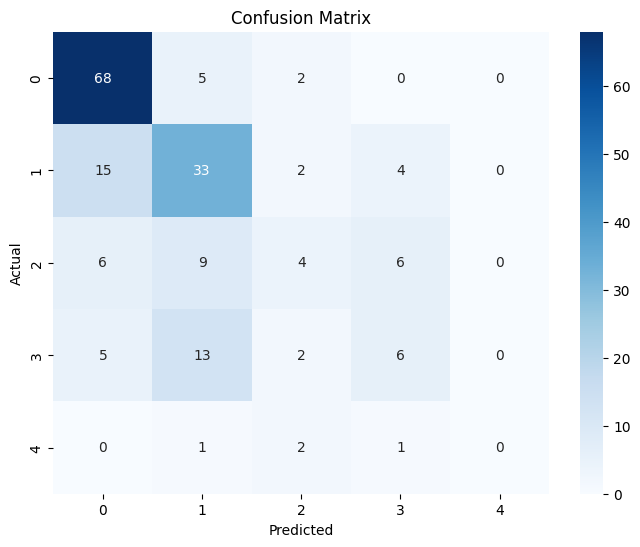


Model saved as 'C:\SUDHA\Personal portfolio project\Models\heart_disease_rf_model_multiclass.pkl'

Feature Importances:
                     Feature  Importance
0                        age    0.135562
2                       chol    0.133489
3                     thalch    0.132232
4                    oldpeak    0.113051
1                   trestbps    0.104518
13                exang_True    0.054750
5                         ca    0.050734
7         cp_atypical angina    0.037162
14                slope_flat    0.033513
6                   sex_Male    0.029897
17    thal_reversable defect    0.028135
8             cp_non-anginal    0.027688
11            restecg_normal    0.025185
16               thal_normal    0.024712
10                  fbs_True    0.021056
12  restecg_st-t abnormality    0.020363
15           slope_upsloping    0.018144
9          cp_typical angina    0.009808

Feature importances saved to 'heart_disease_feature_importances_multiclass.csv'


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load the dataset
data_path = r"C:\SUDHA\Personal portfolio project\datasets\heart_disease_uci.csv"  # Update path if needed
data = pd.read_csv(data_path)

# Inspect the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst few rows:")
print(data.head())

# Define target and features
target_column = "num"  # Use 'num' directly as the target
if target_column not in data.columns:
    raise KeyError(f"Target column '{target_column}' not found in dataset columns: {list(data.columns)}")

# Drop unnecessary columns
columns_to_drop = ['id', 'dataset']  # Drop unrelated columns
data = data.drop(columns=columns_to_drop, axis=1)

# Convert categorical columns to numeric
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Split features and target
X = data.drop(target_column, axis=1)
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save the trained model
model_path = r"C:\SUDHA\Personal portfolio project\Models\heart_disease_rf_model_multiclass.pkl"
joblib.dump(rf_model, model_path)
print(f"\nModel saved as '{model_path}'")

# Optional: Display feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Save feature importances to a CSV file
feature_importances.to_csv(r"C:\SUDHA\Personal portfolio project\Models\heart_disease_feature_importances_multiclass.csv", index=False)
print("\nFeature importances saved to 'heart_disease_feature_importances_multiclass.csv'")



In [3]:
import numpy as np
import pandas as pd
import joblib

# Load the saved model
model_path = r"C:\SUDHA\Personal portfolio project\Models\heart_disease_rf_model_multiclass.pkl"
rf_model = joblib.load(model_path)

# Define a function to take user input and make a prediction
def test_heart_disease_model():
    print("Enter the following details (provide numerical values as appropriate):")
    try:
        # Collect user inputs
        age = int(input("Age: "))
        sex = int(input("Sex (1 = Male, 0 = Female): "))
        cp = int(input("Chest Pain Type (0-3): "))
        trestbps = float(input("Resting Blood Pressure: "))
        chol = float(input("Serum Cholesterol (mg/dl): "))
        fbs = int(input("Fasting Blood Sugar > 120 mg/dl (1 = True, 0 = False): "))
        restecg = int(input("Resting ECG Results (0-2): "))
        thalach = float(input("Maximum Heart Rate Achieved: "))
        exang = int(input("Exercise Induced Angina (1 = Yes, 0 = No): "))
        oldpeak = float(input("ST Depression Induced by Exercise Relative to Rest: "))
        slope = int(input("Slope of the Peak Exercise ST Segment (0-2): "))
        ca = int(input("Number of Major Vessels Colored by Fluoroscopy (0-4): "))
        thal = int(input("Thalassemia (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect): "))
        
        # Convert inputs into a DataFrame with proper feature names
        input_data = {
            "age": [age], "sex": [sex], "cp": [cp], "trestbps": [trestbps], 
            "chol": [chol], "fbs": [fbs], "restecg": [restecg], "thalach": [thalach], 
            "exang": [exang], "oldpeak": [oldpeak], "slope": [slope], "ca": [ca], "thal": [thal]
        }
        
        # Handle categorical features (one-hot encoding alignment with training)
        features = pd.DataFrame(input_data)
        categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
        features = pd.get_dummies(features, columns=categorical_columns, drop_first=True)
        
        # Align columns with the model's training features
        expected_features = rf_model.feature_names_in_
        for col in expected_features:
            if col not in features.columns:
                features[col] = 0  # Add missing columns with default value 0
        features = features[expected_features]  # Ensure the same column order
        
        # Make a prediction
        prediction = rf_model.predict(features)
        probabilities = rf_model.predict_proba(features)

        # Output the result
        stages = {
            0: "No heart disease",
            1: "Mild heart disease (Stage 1)",
            2: "Moderate heart disease (Stage 2)",
            3: "Severe heart disease (Stage 3)",
            4: "Critical heart disease (Stage 4)"
        }
        print(f"\nPredicted Stage: {stages[prediction[0]]}")
        print("Confidence for each stage:")
        for i, prob in enumerate(probabilities[0]):
            print(f"Stage {i}: {prob:.2%}")
    
    except ValueError as e:
        print("\nInvalid input! Please ensure numerical values are entered.")
        print(f"Error: {e}")

# Call the function
test_heart_disease_model()


Enter the following details (provide numerical values as appropriate):

Predicted Stage: Severe heart disease (Stage 3)
Confidence for each stage:
Stage 0: 17.67%
Stage 1: 24.00%
Stage 2: 15.00%
Stage 3: 32.33%
Stage 4: 11.00%
